<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Regression Challenge
This notebook serves for the backend for the presentation and is not intended for submission.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
pred = pd.read_csv('./result/submission_3.csv')
pred.head()

,id,SalePrice
0,2658,133785.589847
1,2718,173944.802861
2,2414,200086.921223
3,1989,107328.426525
4,625,184797.118179


In [3]:
X = pd.read_csv('../assets/scaled.csv')
features = X.columns

In [4]:
df = pd.read_csv('../datasets/test_clean.csv')
df.head()

,id,ms_subclass,ms_zoning,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,low_qual_fin_sf,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold,sale_type,age_sold,age_since_remod,age_garage,total_bath,total_bedroom,total_sqft
0,2658,190,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,1,0,1,GasA,4,0,FuseP,0,2,2,9,Typ,0,0,Detchd,1,1,1,1,1,0,60,112,0,0,0,4,2006,WD,96,56,96.0,2,4,3388
1,2718,90,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,1,0,1,GasA,3,1,SBrkr,0,2,3,10,Typ,0,0,Attchd,3,2,3,3,1,170,0,0,0,0,0,8,2006,WD,29,29,29.0,2,6,4514
2,2414,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,6,554,1,GasA,5,1,SBrkr,0,1,4,7,Typ,1,4,Attchd,2,2,3,3,1,100,24,0,0,0,0,9,2006,New,0,0,0.0,4,3,2576
3,1989,30,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,1,0,1,GasA,3,1,SBrkr,0,1,3,5,Typ,0,0,Detchd,1,2,2,3,0,0,0,184,0,0,0,7,2007,WD,84,1,72.0,1,2,2416
4,625,20,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4,609,1,GasA,4,1,SBrkr,0,1,3,6,Typ,2,4,Attchd,2,2,3,3,1,0,76,0,0,185,0,7,2009,WD,46,46,46.0,3,3,3302


In [5]:
df['saleprice'] = pred['SalePrice']

In [15]:
case_1 = df[(df['total_sqft'] <= 3000) & (df['total_sqft'] >= 2500) 
   & (df['total_bedroom'] == 3) & (df['total_bath'] == 2) & (df['kitchen_qual'] >= 4) & (df['overall_qual'] >= 6)]

In [16]:
case_1['saleprice'].describe()

count        10.000000
mean     168566.523338
std       16316.150989
min      144526.531913
25%      159467.550257
50%      164940.953097
75%      174557.850187
max      197682.502643
Name: saleprice, dtype: float64

In [8]:
df[(df['neighborhood'] == 'StoneBr') & (df['kitchen_qual'] >= 4) & (df['total_bedroom']>= 3) & (df['total_bath'] >=2)]

,id,ms_subclass,ms_zoning,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,low_qual_fin_sf,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold,sale_type,age_sold,age_since_remod,age_garage,total_bath,total_bedroom,total_sqft,saleprice
687,2342,20,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,420.0,5,3,PConc,5,3,4,6,1416,1,GasA,5,1,SBrkr,0,1,5,8,Typ,2,4,Attchd,1,3,3,3,1,351,102,0,0,123,0,9,2006,WD,1,1,1.0,4,3,4632,396321.317718
692,369,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,VinylSd,VinylSd,Stone,16.0,4,3,PConc,5,3,3,5,1274,1,GasA,5,1,SBrkr,0,1,4,7,Typ,1,4,Attchd,3,2,3,3,1,168,36,0,0,0,0,6,2009,WD,4,4,4.0,3,3,3490,267657.218700
781,2336,60,RL,Pave,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,550.0,4,3,PConc,5,3,3,1,0,1,GasA,5,1,SBrkr,0,1,5,10,Typ,1,4,BuiltIn,3,3,3,3,1,272,102,0,0,0,0,1,2006,New,1,0,1.0,4,4,4845,408166.896799
836,2341,20,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,Other,BrkFace,238.0,4,3,PConc,4,3,4,6,1422,1,GasA,5,1,SBrkr,0,1,4,7,Typ,1,3,Attchd,3,3,3,3,1,180,75,0,0,120,0,8,2006,New,1,0,1.0,3,3,4398,330561.130642
867,1633,160,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,2Story,7,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,CBlock,4,3,2,6,828,2,GasA,4,1,SBrkr,0,1,4,6,Min1,1,3,Attchd,3,2,3,3,1,219,0,0,0,0,0,9,2007,WD,23,23,23.0,3,3,3857,253915.180577
871,368,20,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,5,Hip,CompShg,VinylSd,VinylSd,Stone,464.0,4,3,PConc,5,3,2,1,0,1,GasA,5,1,SBrkr,0,1,4,7,Typ,1,4,Attchd,3,3,3,3,1,322,82,0,0,0,0,7,2009,New,1,1,1.0,3,3,4926,363249.368487


In [9]:
train = pd.read_csv('../datasets/train_clean.csv')

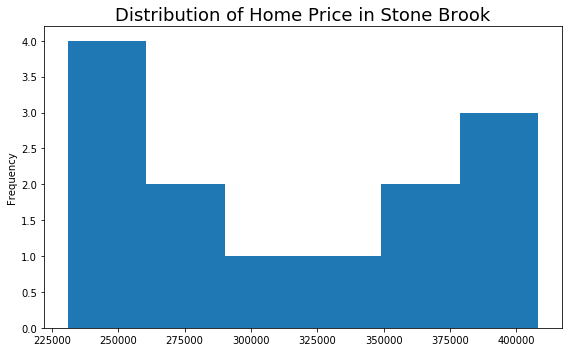

In [10]:
plt.figure(figsize = (8, 5))
df[(df['neighborhood'] == 'StoneBr')]['saleprice'].plot.hist(bins = 6)
plt.title('Distribution of Home Price in Stone Brook', fontsize = 18)
plt.tight_layout()
plt.savefig('../charts/stonebrook_price_hist.png');

In [11]:
train['saleprice'].mean()

181479.01805758907

In [12]:
train[(train['neighborhood'] == 'StoneBr') & (train.saleprice < 200000)]

,id,ms_subclass,ms_zoning,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,low_qual_fin_sf,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_sold,age_since_remod,age_garage,total_bath,total_bedroom,total_sqft
156,2327,120,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,4,3,1,1,0.0,1,GasA,3,1,SBrkr,0,1,3,5,Typ,0,0,Attchd,2,2.0,3,3,1,120,70,0,0,0,0,8,2006,WD,130000,19,19,19.0,2.0,2,2856.0
309,366,120,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,CBlock,4,3,3,6,1036.0,1,GasA,4,1,SBrkr,0,1,4,4,Typ,1,5,Attchd,2,2.0,3,3,1,63,0,0,0,0,0,8,2009,COD,187500,25,25,25.0,2.0,1,3145.0
339,1632,120,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,CBlock,4,3,1,1,0.0,1,GasA,5,1,SBrkr,0,1,4,5,Typ,0,0,Attchd,2,2.0,3,3,1,0,74,137,0,0,0,10,2007,WD,170000,21,21,20.0,2.0,2,2623.0
429,1002,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3,1,6,733.0,1,GasA,4,1,SBrkr,0,1,4,5,Typ,1,3,Attchd,2,2.0,3,3,1,96,0,70,168,0,0,10,2008,WD,180000,15,15,15.0,3.0,2,3136.0
1013,1003,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3,2,1,0.0,1,GasA,5,1,SBrkr,0,1,4,5,Typ,0,0,Attchd,2,2.0,3,3,1,0,82,0,0,144,0,8,2008,WD,180000,16,16,16.0,2.0,2,3066.0
1114,1634,120,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,CemntBd,CmentBd,None,0.0,4,3,CBlock,4,3,4,6,248.0,1,GasA,4,1,SBrkr,0,1,3,5,Typ,0,0,Attchd,2,2.0,3,3,1,0,108,0,0,135,0,10,2007,WD,182000,19,19,19.0,3.0,2,2825.0
1612,1010,120,RL,Pave,IR1,HLS,AllPub,Inside,Mod,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3,4,6,319.0,1,GasA,4,1,SBrkr,0,1,4,5,Typ,1,3,Attchd,2,2.0,3,3,1,0,73,154,0,0,0,4,2008,WD,188500,19,19,19.0,3.0,2,3136.0
1672,8,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3,1,5,263.0,1,GasA,5,1,SBrkr,0,1,4,5,Typ,0,0,Attchd,2,2.0,3,3,1,0,82,0,0,144,0,1,2010,WD,191500,18,18,18.0,2.0,2,3066.0
